# Demographic income

The dataset contains a set of demographic attributes for people in the US.

[Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

You have to build a model to predict whether their salary is higher or lower than 50K.

## 1. Data exploration

The data is contained in the database file: `../../assets/datasets/adult.sqlite`

Load the data into a Pandas Dataframe.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import sqlite3


In [ ]:
# Established out Local DB Connection
conn = sqlite3.connect('../../assets/datasets/adult.sqlite')

# Established a Cursor for our DB connection
c = conn.cursor()

# Creating a DataFrame for querying the adult table at the other end of our DB Connection.
df = pd.read_sql("SELECT * FROM adult;", conn)

### 1 Missing values

Are there any missing values?
How will you deal with them?

Discuss this with your classmate and decide on a strategy for imputation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# We have missing values in Workclass, occupation, and Native Country

In [4]:
# I filled the NULLs with question marks because... Why the heck not!
df = df.fillna('???')

#### Other possible strategies:
 - fill with media value
 - sample values out of the column distribution
 - build a model that predicts the missing values from the other columns

## 2. Target

Salary is separated in 2 classes '<=50K' and '>50K'.

Create a new boolean variable called target that is True for salary >50K and False otherwise

In [5]:
# where salary is not like <=50k
target = df.salary != '<=50K'

### 3 Features

The dataset contains many features.

- Are they numerical?
- Are they categorical?

In [33]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

YES and YES

### 3.a Age distribution

What is the distribution of age? How does age correlate with the outcome variable?

- Plot a histogram of the age column
- Separate by target variable and plot the age distribution for the 2 classes

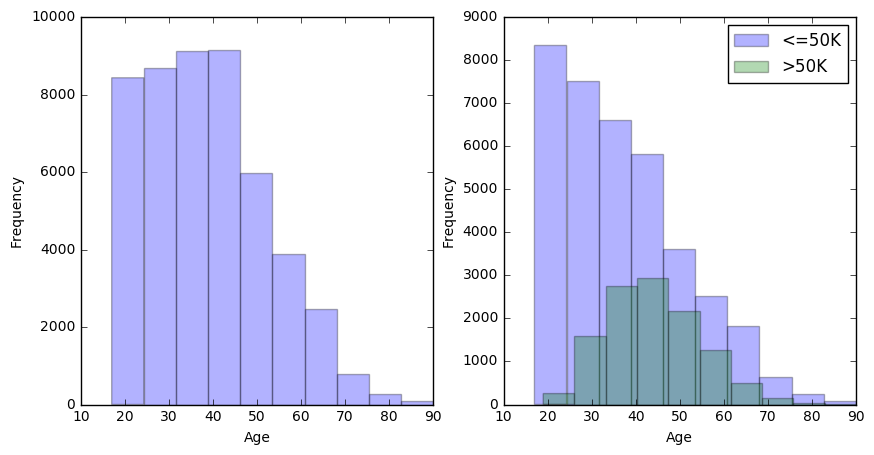

In [6]:
# Lets make a histagram of Age.
plt.figure(figsize = (10,5))
# Subplot allows us to plot side by side, breakdown below the visualization
plt.subplot(121)
df.age.plot(kind='hist', alpha = 0.3)
plt.xlabel('Age')

# Lets make overlapping histagrams based on Values
plt.subplot(122)
# Little tilde indicates 'not'. IE.  'DF[not[target]']
df[~target].age.plot(kind='hist', alpha = 0.3)
df[target].age.plot(kind='hist', alpha = 0.3)
plt.legend(['<=50K', '>50K'])
plt.xlabel('Age')

In [ ]:
#plt.subplot(121), this '121' identifies the matrix we will want out plots plotted on.
# Lets Break it down like '1,2,1'.  'rows, columns, position'
# 1 row
# 2 Columns
# 1st Position


The only thing that is clearly visible is that there are many more young people in the low income class.

### 3.b Categorical Features Distributions

Investigate the relation of each categorical feature with the salary class:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Use a bar-chart to visualize the relative frequency of each of the  elements in the group.
Use two colors to distinguish between the low and high salary class.

For which features is there significant difference in ratios?

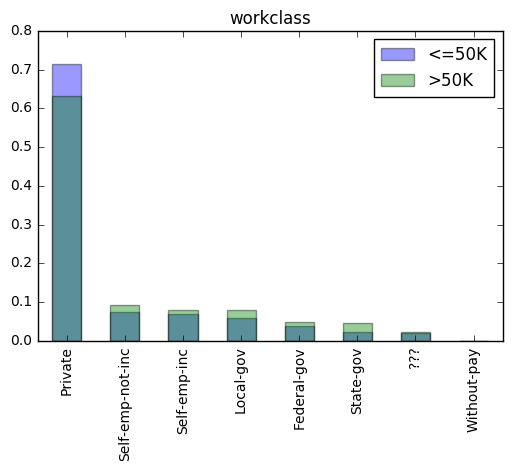

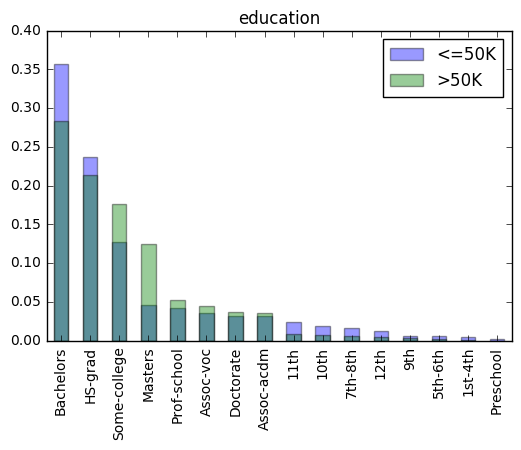

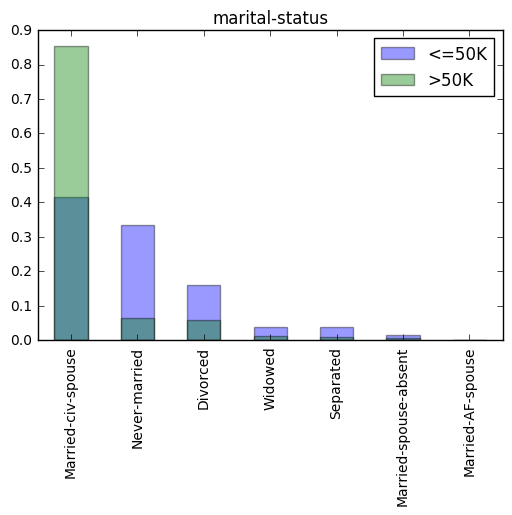

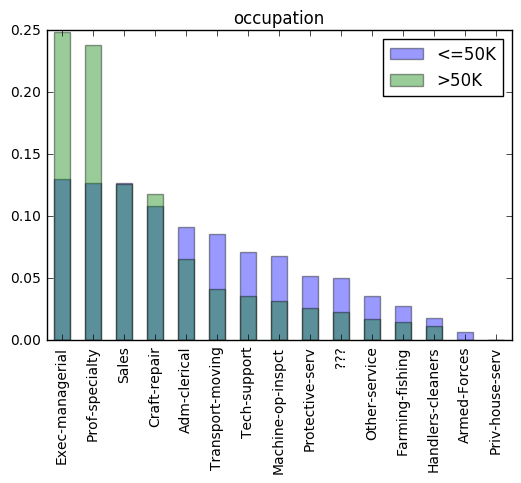

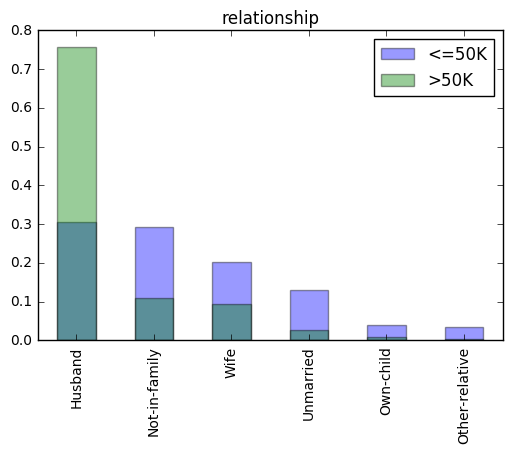

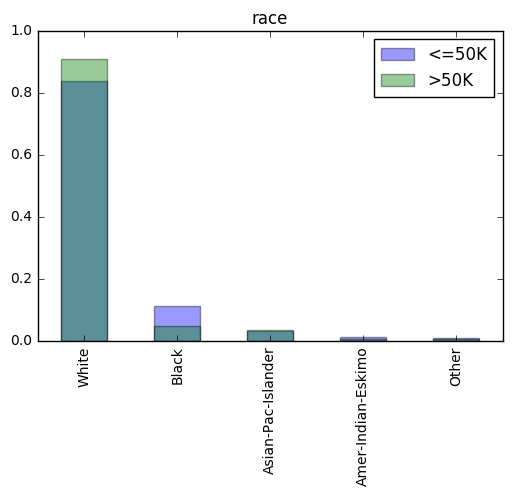

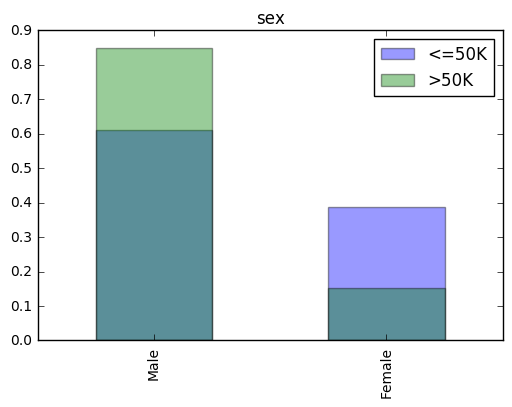

In [7]:
# Categorical Columns
catcols = [u'workclass', u'education', u'marital-status',
           u'occupation', u'relationship', u'race', u'sex']

# Lets stack some barcharts using functions!
for c in catcols:
    plt.figure()
    (df.loc[~target,c].value_counts() / df.loc[~target,c].count()).plot(kind='bar', alpha = 0.4, color = 'blue')
    (df.loc[target,c].value_counts() / df.loc[target,c].count()).plot(kind='bar', alpha = 0.4, color = 'green')
    plt.legend(['<=50K', '>50K'])
    plt.title(c)
# Alpha is the transparency of the bar.

### 3.c Other numerical features distribution

Like you did for age, investigate the distribution of other numerical features for the 2 classes.

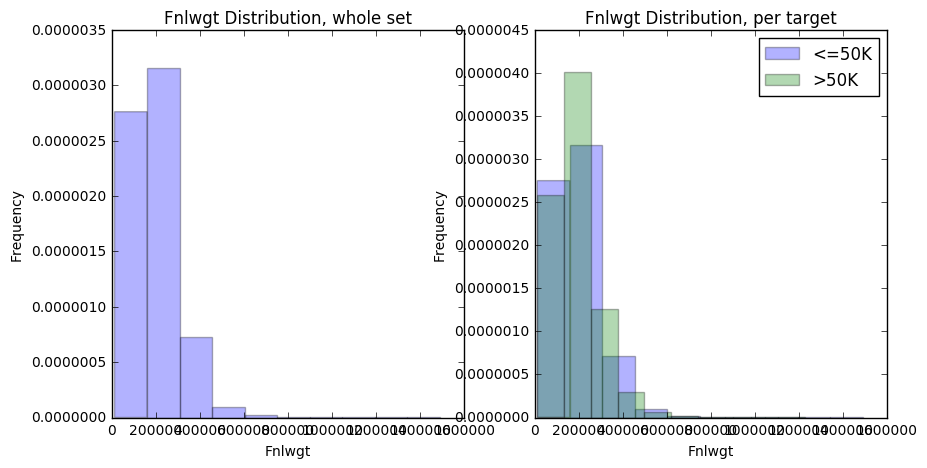

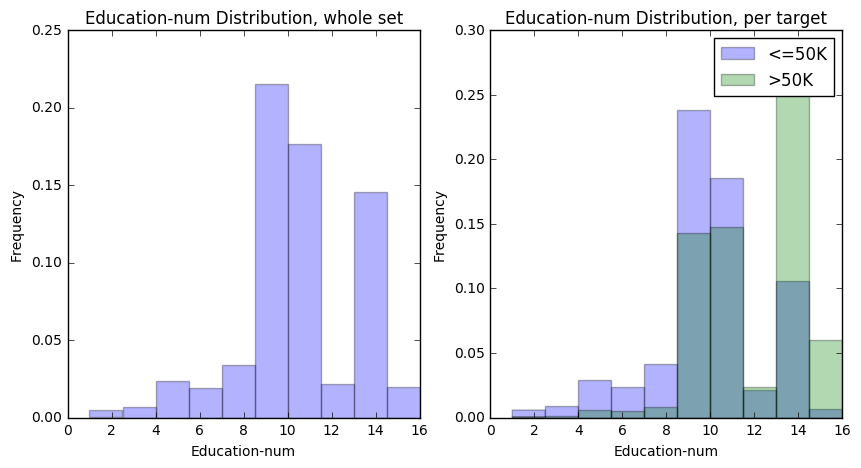

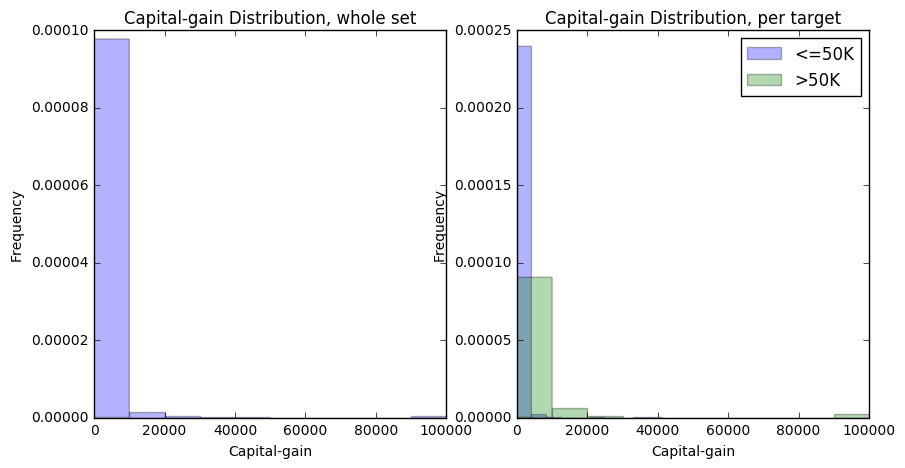

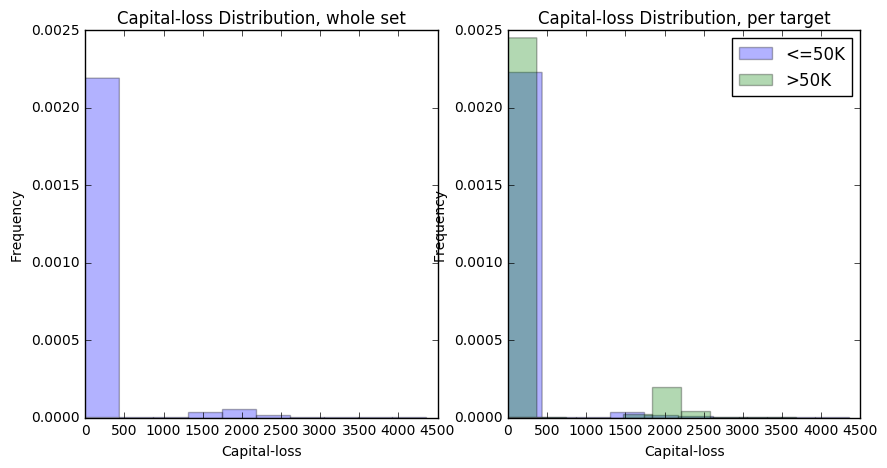

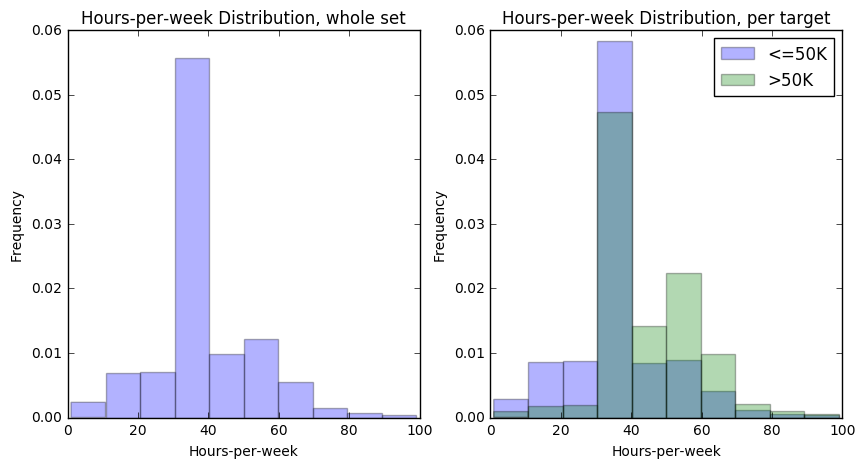

In [8]:
# These first one is pretty hideous, ignore it.  
def do_plot_hist(feat):
    plt.figure(figsize = (10,5))
    plt.subplot(121)
    df[feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, whole set')

    plt.subplot(122)
    df[~target][feat].plot(kind='hist', alpha = 0.3, normed = True)
    df[target][feat].plot(kind='hist', alpha = 0.3, normed = True)
    plt.legend(['<=50K', '>50K'])
    plt.xlabel(feat.capitalize())
    plt.title(feat.capitalize() + ' Distribution, per target')

for c in [u'fnlwgt', u'education-num', u'capital-gain',
          u'capital-loss', u'hours-per-week']:
    do_plot_hist(c)

## 4. Dummy Columns

Scikit-Learn models require features with numerical values. In order to use all the categorical features in our model, we need to encode them into numbers. The way of doing this called 1-Hot Encoding, or dummy column creation.
Both Pandas and Scikit Learn offer an interface to do this. Please feel free to choose whichever you prefer.

Example:

|Categorical Feature|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [9]:
dummies = pd.get_dummies(df[['workclass','education','marital-status',
                             'occupation','relationship','race','sex',
                             'native-country']])

## 5. Numerical Features normalization

Numerical Features may have different scales. This can be a problem in some cases, so we can try to normalize using a scaler.

Use a scaler from Scikit-learn Preprocessing to rescale the numerical features.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discuss within your team about pros/cons of each scaler.

In [10]:
ncols = ['age', 'fnlwgt', 'education-num',
         'capital-gain', 'capital-loss', 'hours-per-week']
# Getting some of our numeric columns
numerical = df[ncols]

# Getting ready to scale
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
# Scaling features in our numeric DataFrame
ns = mms.fit_transform(numerical)

# Setting some new column names by augmenting the list ncols
scaled_cols = ['scaled_'+s for s in ncols]

# Creating a new dataframe of the scaled data where the column names are scaled columns
numerical_scaled = pd.DataFrame(ns, columns = scaled_cols)

In [11]:
numerical_scaled.head()


,scaled_age,scaled_fnlwgt,scaled_education-num,scaled_capital-gain,scaled_capital-loss,scaled_hours-per-week
0,0.301370,0.044131,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048052,0.800000,0.00000,0.0,0.122449
2,0.287671,0.137581,0.533333,0.00000,0.0,0.397959
3,0.493151,0.150486,0.400000,0.00000,0.0,0.397959
4,0.150685,0.220635,0.800000,0.00000,0.0,0.397959


## 6. Additional Exploratory Data Analysis

Conduct additional exploratory data analysis. These must include both univariate and bivariate analyses.

In [ ]:
# You got this

## 7. Combine Features

Combine the dummy features and the scaled feature into a single dataset called `X`.

Rename the target variable `y`.

What's the accuracy score of a benchmark model? What's the simplest model you could build?

In [13]:
# Setting X and y values
X = pd.concat([dummies, numerical_scaled], axis=1)
y = df.salary == '>50K'

#Checking distribution of True and False
# This will be useful when evaluating models and outputs
y.value_counts()/len(y)

False    0.760718
True     0.239282
Name: salary, dtype: float64

If we out model predicted that all of our outputs would be false it would still be correct 76% of the time.  That being said, for our model to be useful it will need to outperform the baseline of predicting False everytime.  I.E. Beat the Model Score of 0.76

## 8. Build and evaluate model

Build a model using KNN or Logistic regression.

Split your data into train and test subset using the following line:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluate the `accuracy_score` of your model.
- Display the confusion matrix and the classification report
- Try to improve the model by tuning the parameters. For example:
    - KNN: Change the number of Neighbors
    - LogisticRegression: Change the strength of the regularization
    
Discuss and compare your best model with other teams


In [14]:
# K-Nearest Neighbors and Logistic "Regression" (Classification)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
# Setting classifier with a K of 5
clf = KNeighborsClassifier(5)

In [16]:
# Maybe we'll do a little cross validation as well
from sklearn.cross_validation import cross_val_score

In [17]:
# May take a few minutes to run ( DownSide of us a CV)
cross_val_score(KNeighborsClassifier(5), X, y)

array([ 0.82531786,  0.8254407 ,  0.8232801 ])

In [18]:
cross_val_score(LogisticRegression(), X, y)
# Default CVs looks to be 3

array([ 0.84835084,  0.85406302,  0.8502457 ])

In [19]:
# Lets get this party rolling with some TTS and some scoring metrics.
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
# TTS FTW
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
lr = LogisticRegression(C=100.0, class_weight='balanced')
# C is the Inverse of our Regularization Strength.

In [22]:
# Fitting Logistic Regression
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
# Predicting with the Fit Logistic Regression
y_pred = lr.predict(X_test)

In [24]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

      False       0.94      0.80      0.86     12204
       True       0.57      0.84      0.68      3914

avg / total       0.85      0.81      0.82     16118



In [25]:
confusion_matrix(y_test, y_pred)

array([[9743, 2461],
       [ 626, 3288]])

In [36]:
lr.score(X_test, y_test)
# Model score above baseline.  This Could be a useful model!

0.80847499689787816

In [26]:
from sklearn.grid_search import GridSearchCV
# Lets try for some optimization using GridSearc h

In [27]:
# Lets just see what regularization strength is best
clf = GridSearchCV(LogisticRegression(class_weight='balanced'),
                   {"C":[0.01,0.1,1.0,10.0,100.0]},
                   n_jobs=-1
                  )

In [28]:
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [29]:
clf.best_estimator_

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
clf.best_params_
# Per our gridsearch a C value of 100 is the best C value to pass
# Which we passed earlier so there is no reason to remodel

{'C': 100.0}